In [23]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import seaborn as sns

# Open the CSV file
df = pd.read_csv('./chips.csv')  
X = df[['x', 'y']].values

# Map class names to numerical values
class_mapping = {'P': -1, 'N': 1}

# Replace 'class' values with numerical values
y = df['class'].map(class_mapping).values

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Perform Grid Search for SVM
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}
svm = SVC()
grid_search_svm = GridSearchCV(svm, param_grid, cv=3, scoring='f1_macro')
grid_search_svm.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for SVM:", grid_search_svm.best_params_)

# Train a support vector machine classifier with the best parameters
best_svm = SVC(**grid_search_svm.best_params_)
best_svm.fit(X_train, y_train)

# Get the coefficients and intercept for the separating line
w1, w2 = best_svm.coef_[0]
b = best_svm.intercept_[0]

# Print the resulting equation
print("Resulting Equation of the Separating Line:")
print(f"f(x) = {w1:.4f} * x_1 + {w2:.4f} * x_2 + {b:.4f}")


Best Parameters for SVM: {'C': 10, 'kernel': 'linear'}
Resulting Equation of the Separating Line:
f(x) = 0.9083 * x_1 + -0.9620 * x_2 + 0.1239


Automatically created module for IPython interactive environment


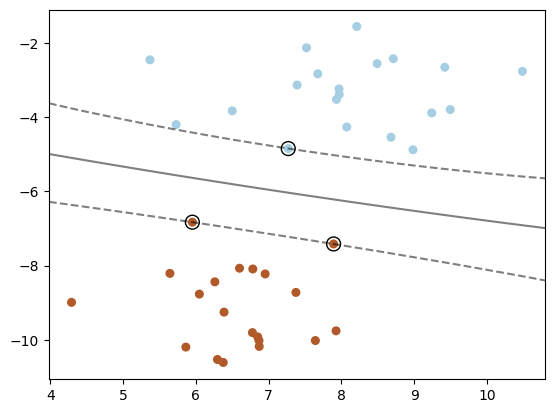

In [5]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='rbf', C=1000)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Resulting Equation SGD:
f(x) = 14.3619 * x_1 + 217.6857 * x_2 + -759.2331
F1 Macro Score (SGD) Chips: 0.35714285714285715
F1 Macro Score (SGD) Geyser: 0.8860544217687075
Best Parameters for SVM chips: {'C': 10, 'kernel': 'linear'}
Best Parameters for SVM GEYSER: {'C': 1, 'kernel': 'linear'}


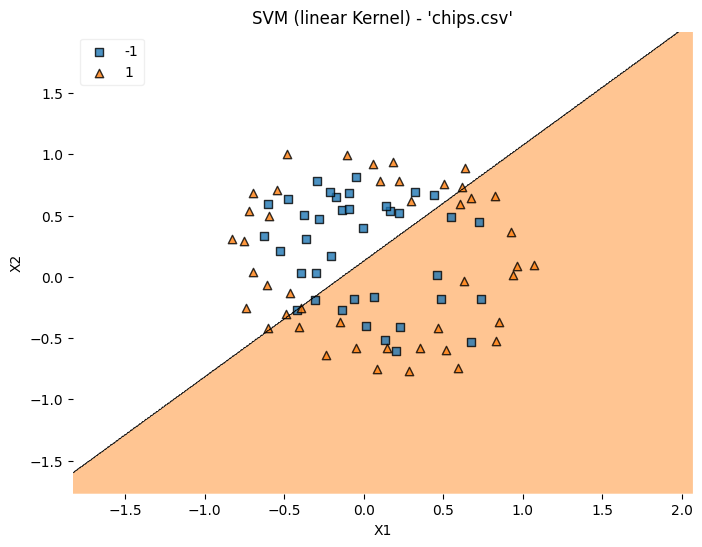

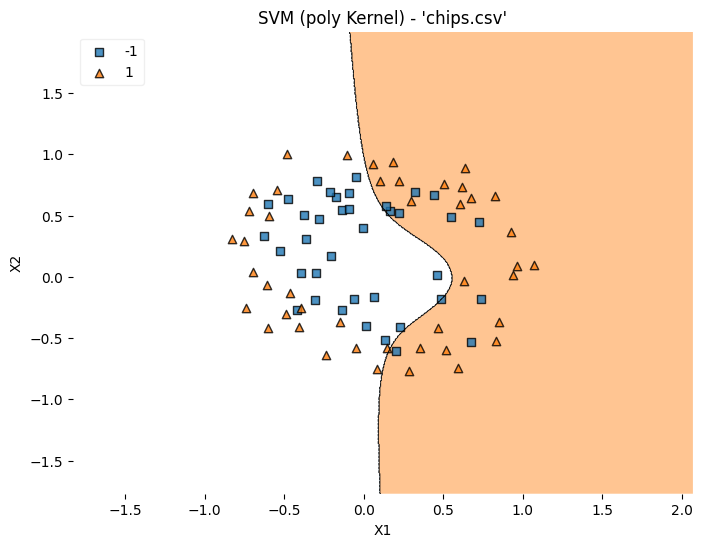

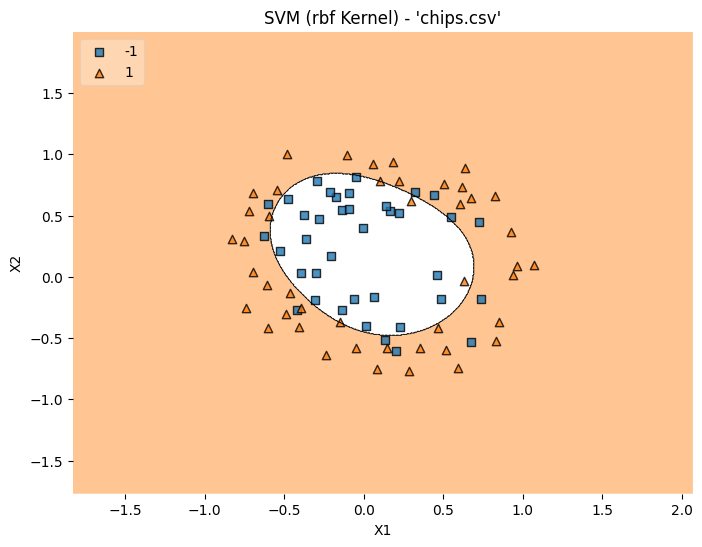

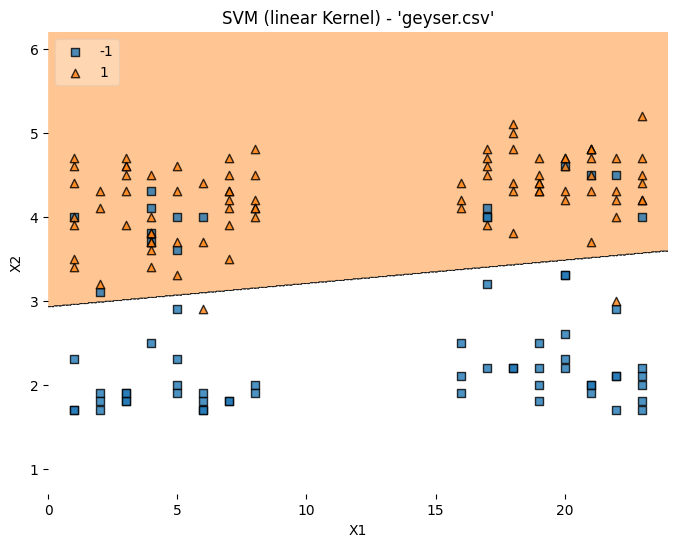

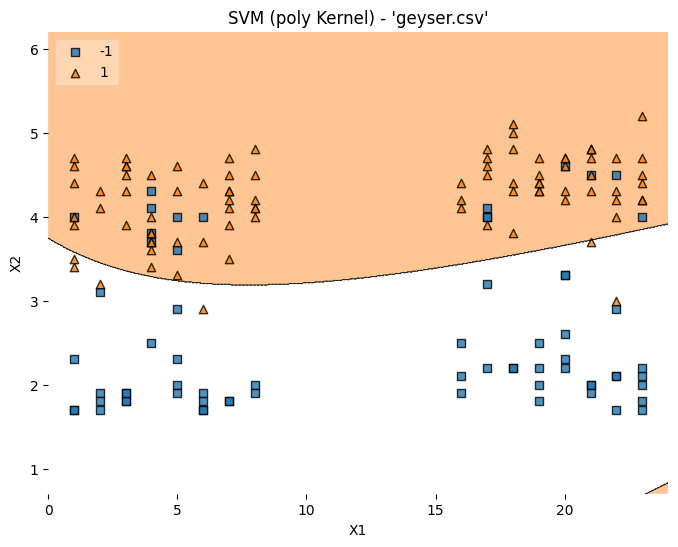

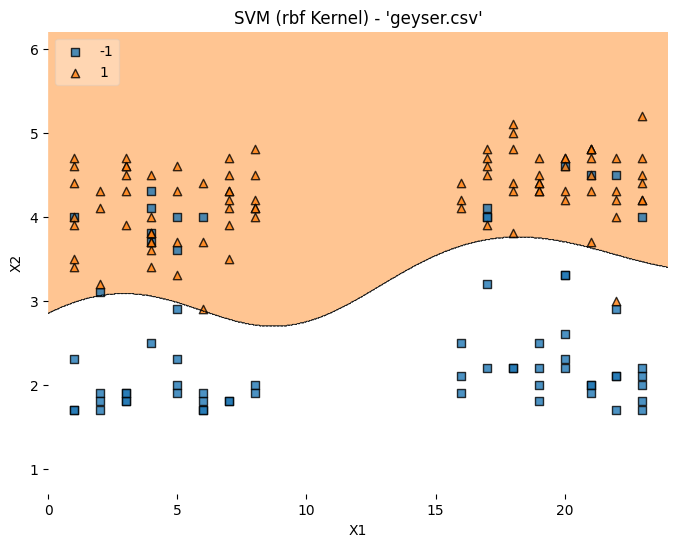

In [60]:
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# Open the CSV file
chips = pd.read_csv('./chips.csv')
geyser = pd.read_csv('./geyser.csv')

X = chips[['x', 'y']].values
X2 = geyser[['x','y']].values

# Map class names to numerical values
class_mapping = {'P': -1, 'N': 1}

# Replace 'class' values with numerical values
y = chips['class'].map(class_mapping).values
y2 = geyser['class'].map(class_mapping).values

 
 
# Split the data into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

 

# Train an SGD classifier
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
sgd.fit(X2_train, y2_train)


# Get the coefficients and intercept for the separating line
w1, w2 = sgd.coef_[0]
b = sgd.intercept_[0]

# Print the resulting equation
print("Resulting Equation SGD:")
print(f"f(x) = {w1:.4f} * x_1 + {w2:.4f} * x_2 + {b:.4f}")


# Make predictions on the test data for SGD classifier
y_pred_sgd = sgd.predict(X_test)
y_pred_sgd2 = sgd.predict(X2_test)


# Compute the F1 score for SGD classifier
f1_macro_sgd = f1_score(y_test, y_pred_sgd, average='macro')
print("F1 Macro Score (SGD) Chips:", f1_macro_sgd)

f1_macro_sgd2 = f1_score(y2_test, y_pred_sgd2, average='macro')
print("F1 Macro Score (SGD) Geyser:", f1_macro_sgd2)



# Perform Grid Search for SVM
param_grid = {'C': [0.1, 1, 10, 100], 'kernel': ['linear']}
svm = SVC()

grid_search_svm = GridSearchCV(svm, param_grid, cv=3, scoring='f1_macro')
grid_search_svm2 = GridSearchCV(svm, param_grid, cv=3, scoring='f1_macro')

grid_search_svm2.fit(X2_train, y2_train)
grid_search_svm.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters for SVM chips:", grid_search_svm.best_params_)
print("Best Parameters for SVM GEYSER:", grid_search_svm2.best_params_)

# # Train a support vector machine classifier with the best parameters
# best_svm = SVC(**grid_search_svm.best_params_)
# best_svm.fit(X_train, y_train)

# best_svm2 = SVC(**grid_search_svm2.best_params_)
# best_svm2.fit(X2_train, y2_train)

# # Get the coefficients and intercept for the separating line
# w1, w2 = best_svm.coef_[0]
# b = best_svm.intercept_[0]

# # Print the resulting equation
# print("Resulting SVM:")
# print(f"f(x) = {w1:.4f} * x_1 + {w2:.4f} * x_2 + {b:.4f}")

# # Make predictions on the test data
# y_pred_svm = best_svm.predict(X_test)
# y_pred_svm2 = best_svm2.predict(X2_test)

# # Compute the F1 score for SVM
# f1_macro_svm = f1_score(y_test, y_pred_svm, average='macro')
# print("F1 Macro Score (SVM) of Chips:", f1_macro_svm)

# f1_macro_svm2 = f1_score(y2_test, y_pred_svm2, average='macro')
# print("F1 Macro Score (SVM) Geyser:", f1_macro_svm2)


# Define a function to visualize decision boundaries
def plot_decision_boundary(X, y, clf, title):
    plt.figure(figsize=(8, 6))
    plot_decision_regions(X, y, clf=clf, legend=2)
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.show()


# Define SVM models with different kernels
kernels = ['linear', 'poly', 'rbf']
best_params = {}

# Iterate over different kernels
for kernel in kernels:
    # Perform Grid Search for SVM with the current kernel
    param_grid = {'C': [0.1, 1, 10, 100]}
    svm = SVC(kernel=kernel)
    grid_search_svm = GridSearchCV(svm, param_grid, cv=3, scoring=make_scorer(f1_score, average='macro'))
    grid_search_svm.fit(X_train, y_train)

    # Store the best parameters
    best_params[kernel] = grid_search_svm.best_params_

    # Train an SVM classifier with the best parameters
    best_svm_chips = SVC(kernel=kernel, C=grid_search_svm.best_params_['C'])
    best_svm_chips.fit(X_train, y_train)

    # Visualize the decision boundary
    plot_decision_boundary(X_train, y_train, best_svm_chips, f"SVM ({kernel} Kernel) - 'chips.csv'")

# Compare SVM results based on F1 score for 'chips.csv'
f1_scores_chips = {}
for kernel in kernels:
    best_svm_chips = SVC(kernel=kernel, C=best_params[kernel]['C'])
    best_svm_chips.fit(X_train, y_train)
    y_pred_chips = best_svm_chips.predict(X_test_chips)
    f1_scores_chips[kernel] = f1_score(y_test_chips, y_pred_chips, average='macro')



# Iterate over different kernels
for kernel in kernels:
    # Perform Grid Search for SVM with the current kernel
    param_grid = {'C': [0.1, 1, 10, 100]}
    svm = SVC(kernel=kernel)
    grid_search_svm = GridSearchCV(svm, param_grid, cv=3, scoring=make_scorer(f1_score, average='macro'))
    grid_search_svm.fit(X2_train, y2_train)

    # Store the best parameters
    best_params[kernel] = grid_search_svm.best_params_

    # Train an SVM classifier with the best parameters
    best_svm_geyser = SVC(kernel=kernel, C=grid_search_svm.best_params_['C'])
    best_svm_geyser.fit(X2_train, y2_train)

    # Visualize the decision boundary
    plot_decision_boundary(X2_train, y2_train, best_svm_geyser, f"SVM ({kernel} Kernel) - 'geyser.csv'")

# Compare SVM results based on F1 score for 'chips.csv'
f1_scores_chips = {}
for kernel in kernels:
    best_svm_geyser = SVC(kernel=kernel, C=best_params[kernel]['C'])
    best_svm_geyser.fit(X2_train, y2_train)
    y_pred_geyser = best_svm_geyser.predict(X2_test)
    f1_scores_chips[kernel] = f1_score(y2_test, y_pred_geyser, average='macro')

